# 1. Import modules

In [ ]:
#Imports
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# 2. Define functions to build and train the model

In [ ]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential() #model with one or more layers.
  
  # The topography of a simple linear regression model is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  
  # Compile the model topography into code -> minimize model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error", 
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           

def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse



# 3. Define plotting functions

In [ ]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs label values.
  plt.scatter(feature, label)

  # Plorring red line from (x0, y0) to (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # scatter plot and the red line (regression line)
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()



# 4. Define dataset

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# 5.Specify the hyperparameters
In this prooject the hyperparameters are:
- Learning rate
- Epochs
- Batch_size





/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1/1 [==============================] - 1s 805ms/step - loss: 395.3076 - root_mean_squared_error: 19.8823
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 385.0054 - root_mean_squared_error: 19.6216
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 377.6629 - root_mean_squared_error: 19.4336
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 371.5926 - root_mean_squared_error: 19.2767
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: 366.2606 - root_mean_squared_error: 19.1379
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 361.4197 - root_mean_squared_error: 19.0110
Epoch 7/10
1/1 [==============================] - 0s 21ms/step - loss: 356.9325 - root_mean_squared_error: 18.8927
Epoch 8/10
1/1 [==============================] - 0s 35ms/step - loss: 352.7134 - root_mean_squared_error: 18.7807
Epoch 9/10
1/1 [==============================] - 0s 21ms/step - loss: 348.7055

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


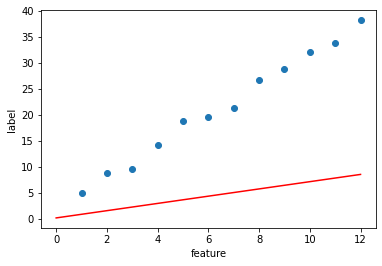

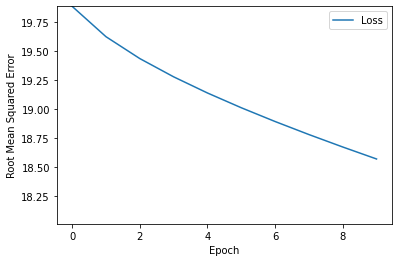

In [ ]:
#Initial hyperparameters values
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#6. Tune the hyperparameter
### - Learning rate and epochs

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
1/1 [==============================] - 1s 613ms/step - loss: 536.9372 - root_mean_squared_error: 23.1719
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 370.9403 - root_mean_squared_error: 19.2598
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 278.3379 - root_mean_squared_error: 16.6835
Epoch 4/30
1/1 [==============================] - 0s 25ms/step - loss: 215.1870 - root_mean_squared_error: 14.6693
Epoch 5/30
1/1 [==============================] - 0s 48ms/step - loss: 168.6451 - root_mean_squared_error: 12.9863
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 132.9646 - root_mean_squared_error: 11.5310
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 104.9997 - root_mean_squared_error: 10.2469
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 82.8064 - root_mean_squared_error: 9.0998
Epoch 9/30
1/1 [==============================] - 0s 26ms/step - loss: 65.0801 - 

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


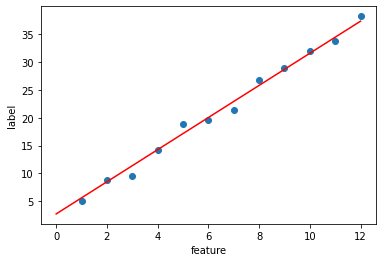

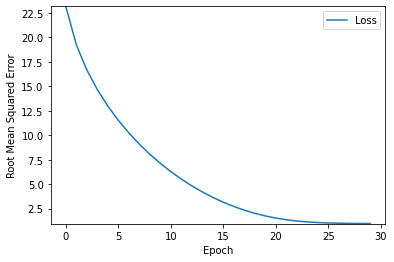

In [ ]:
#Epochs tuning 
learning_rate=0.15
epochs=30
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

### b. Batch size


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 5ms/step - loss: 319.3919 - root_mean_squared_error: 17.8715
Epoch 2/30
2/2 [==============================] - 0s 10ms/step - loss: 139.6849 - root_mean_squared_error: 11.8188
Epoch 3/30
2/2 [==============================] - 0s 10ms/step - loss: 70.7501 - root_mean_squared_error: 8.4113
Epoch 4/30
2/2 [==============================] - 0s 10ms/step - loss: 42.4502 - root_mean_squared_error: 6.5154
Epoch 5/30
2/2 [==============================] - 0s 10ms/step - loss: 24.7778 - root_mean_squared_error: 4.9777
Epoch 6/30
2/2 [==============================] - 0s 10ms/step - loss: 12.6173 - root_mean_squared_error: 3.5521
Epoch 7/30
2/2 [==============================] - 0s 19ms/step - loss: 6.4739 - root_mean_squared_error: 2.5444
Epoch 8/30
2/2 [==============================] - 0s 10ms/step - loss: 3.4363 - root_mean_squared_error: 1.8537
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 1.9783 - root_mean_squared_error: 1.

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


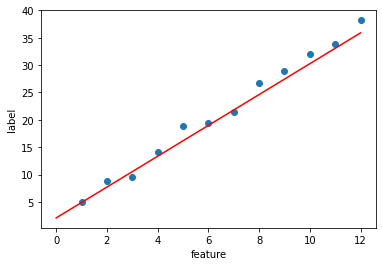

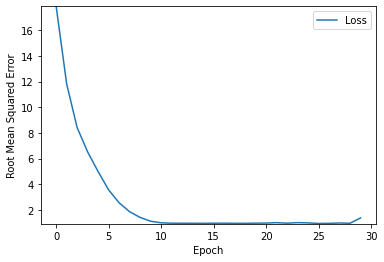

In [ ]:
learning_rate=0.15
epochs=30
my_batch_size=8

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

#Hyperparameter tuning: rules of thumb

- Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
- If the training loss does not converge, train for more epochs.
- If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
- If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
- Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
- Setting the batch size to a very small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
- For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

The ideal combination of hyperparameters is data dependent, so you must always experiment and verify.